Adapted from Mathilde Koch, INRAe, Faulon's group.

The aim of this script is to extract information on compounds' effects on the mix, through a mutual information analysis. These results are presented in Figure 1g and Supplementary Figure 3 of the accompanying paper.

# Python libraries imports

In [11]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression
from collections import Mapping, namedtuple, defaultdict, Sequence

import numpy as np
import csv
import random

import matplotlib.pyplot as plt

# Define data location

In [3]:
specific_experimentalist = "ORI"

folder_for_full_data = "data/ORI_full/no_controls"  # Data from the study, without the control points of lines A and P. 
folder_for_reduced_data = "data/{}".format(specific_experimentalist)
folder_to_save = "{}_mi".format(specific_experimentalist)
# folder_to_save = "{}".format("OB_full_mi")

# Importing full data from the study

In [4]:
plate_1 = "{}/plate_AL_1_raw_yield_and_std.csv".format(folder_for_full_data)
plate_1_array = np.genfromtxt(plate_1, delimiter=',', skip_header = 1,dtype = "float")

plate_2 = "{}/plate_AL_2_raw_yield_and_std.csv".format(folder_for_full_data)
plate_2_array = np.genfromtxt(plate_2, delimiter=',', skip_header = 1,dtype = "float")

plate_3 = "{}/plate_AL_3_raw_yield_and_std.csv".format(folder_for_full_data)
plate_3_array = np.genfromtxt(plate_3, delimiter=',', skip_header = 1,dtype = "float")

plate_4 = "{}/plate_AL_4_raw_yield_and_std.csv".format(folder_for_full_data)
plate_4_array = np.genfromtxt(plate_4, delimiter=',', skip_header = 1,dtype = "float")

plate_5 = "{}/plate_AL_5_raw_yield_and_std.csv".format(folder_for_full_data)
plate_5_array = np.genfromtxt(plate_5, delimiter=',', skip_header = 1,dtype = "float")

plate_6 = "{}/plate_AL_6_raw_yield_and_std.csv".format(folder_for_full_data)
plate_6_array = np.genfromtxt(plate_6, delimiter=',', skip_header = 1,dtype = "float")

plate_7 = "{}/plate_AL_7_raw_yield_and_std.csv".format(folder_for_full_data)
plate_7_array = np.genfromtxt(plate_7, delimiter=',', skip_header = 1,dtype = "float")

plate_8 = "{}/plate_AL_8_raw_yield_and_std.csv".format(folder_for_full_data)
plate_8_array = np.genfromtxt(plate_8, delimiter=',', skip_header = 1,dtype = "float")

plate_9 = "{}/plate_AL_9_raw_yield_and_std.csv".format(folder_for_full_data)
plate_9_array = np.genfromtxt(plate_9, delimiter=',', skip_header = 1,dtype = "float")

plate_10 = "{}/plate_AL_10_raw_yield_and_std.csv".format(folder_for_full_data)
plate_10_array = np.genfromtxt(plate_10, delimiter=',', skip_header = 1,dtype = "float")

In [5]:
def data_from_iteration(iteration_number = 1):
    
    """
    Obtain data from the desired number of iterations, and not the whole data.
    """
    
    full_plates_list = [plate_1_array, 
                        plate_2_array, 
                        plate_3_array, 
                        plate_4_array, 
                        plate_5_array,
                        plate_6_array, 
                        plate_7_array, 
                        plate_8_array, 
                        plate_9_array, 
                        plate_10_array]
    
    selected_plates = full_plates_list[0:iteration_number]
    current_data = np.concatenate(selected_plates, axis = 0)
    return(current_data)

In [6]:
data = data_from_iteration(10)
X_data, y_data, y_std_data = data[:, 0:11], data[:, 11], data[:, 12]
for i in range(X_data.shape[1]):
    X_data[:,i] = X_data[:,i]/max(X_data[:,i])

# Importing specific datasets

In [7]:
data = np.genfromtxt("{}/102_points.csv".format(folder_for_reduced_data), delimiter=',', skip_header = 1,dtype = "float")
X_data, y_data, y_std_data = data[:, 0:11], data[:, 11], data[:, 12]
for i in range(X_data.shape[1]):
    X_data[:,i] = X_data[:,i]/max(X_data[:,i])

# Mutual information analysis

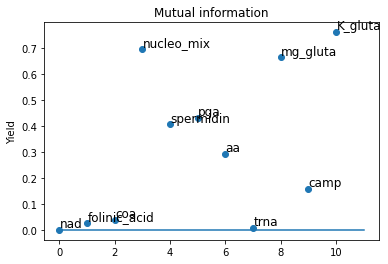

In [10]:
product_order = ["nad", 
                 "folinic_acid", 
                 "coa", 
                 "nucleo_mix", 
                 "spermidin", 
                 "pga", 
                 "aa", 
                 "trna", 
                 "mg_gluta", 
                 "camp", 
                 "K_gluta"]

mi_dict = {}

for i in range(len(product_order)):
    feature = X_data[:, i].reshape(-1, 1)
    mi = sklearn.feature_selection.mutual_info_regression(feature, y_data)
    mi_dict[product_order[i]] = mi

mi_values = [mi_dict[local_product] for local_product in product_order]

fig, ax = plt.subplots()
ax.scatter(range(len(mi_values)), mi_values)
ax.set_ylabel("Yield")
ax.set_title("Mutual information")
plt.plot([0, 11],[0,0])
for i in range(len(mi_values)):
    ax.annotate(text = product_order[i], size=12, 
                xy = (i, mi_values[i]),
                xytext=(i + 0.01, mi_values[i] + 0.01))   
name_for_plotting = '{}/mutual_information.png'.format(folder_to_save)
plt.savefig(name_for_plotting)
plt.show()
    

In [8]:
with open("{}/coefficents_from_mi.csv".format(folder_to_save), "w") as file:
    writer = csv.DictWriter(file, fieldnames = ["Name", "Mean"])
    writer.writeheader()
    for i in range(len(product_order)):
        row = {}
        row["Name"] = product_order[i]
        row["Mean"] = mi_dict[product_order[i]]
        writer.writerow(row)